In [17]:
# Importar librerías


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import plotly.express as px
from IPython.display import display


# Cargar datasets
calls = pd.read_csv('telecom_dataset_us.csv')
clients = pd.read_csv('telecom_clients_us.csv')



In [18]:
# Vista inicial

display(calls.head(), calls.info())
display(clients.head(), clients.info())

# Comprobar nulos

print(calls.isna().sum())
print(clients.isna().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53902 entries, 0 to 53901
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   user_id              53902 non-null  int64  
 1   date                 53902 non-null  object 
 2   direction            53902 non-null  object 
 3   internal             53785 non-null  object 
 4   operator_id          45730 non-null  float64
 5   is_missed_call       53902 non-null  bool   
 6   calls_count          53902 non-null  int64  
 7   call_duration        53902 non-null  int64  
 8   total_call_duration  53902 non-null  int64  
dtypes: bool(1), float64(1), int64(4), object(3)
memory usage: 3.3+ MB


,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration
0,166377,2019-08-04 00:00:00+03:00,in,False,NaN,True,2,0,4
1,166377,2019-08-05 00:00:00+03:00,out,True,880022.0,True,3,0,5
2,166377,2019-08-05 00:00:00+03:00,out,True,880020.0,True,1,0,1
3,166377,2019-08-05 00:00:00+03:00,out,True,880020.0,False,1,10,18
4,166377,2019-08-05 00:00:00+03:00,out,False,880022.0,True,3,0,25


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   user_id      732 non-null    int64 
 1   tariff_plan  732 non-null    object
 2   date_start   732 non-null    object
dtypes: int64(1), object(2)
memory usage: 17.3+ KB


,user_id,tariff_plan,date_start
0,166713,A,2019-08-15
1,166901,A,2019-08-23
2,168527,A,2019-10-29
3,167097,A,2019-09-01
4,168193,A,2019-10-16


None

user_id                   0
date                      0
direction                 0
internal                117
operator_id            8172
is_missed_call            0
calls_count               0
call_duration             0
total_call_duration       0
dtype: int64
user_id        0
tariff_plan    0
date_start     0
dtype: int64


In [19]:
# 2. Limpieza básica
def limpiar_dataframe(df):
    df = df.replace(r'^\s*$', np.nan, regex=True)
    df = df.dropna(how='all')
    if df.shape[1] > 0:
        mask = df.apply(lambda row: all(str(v).strip()=='' for v in row), axis=1)
        df = df.loc[~mask]
    return df.reset_index(drop=True)

calls   = limpiar_dataframe(calls)
clients = limpiar_dataframe(clients)

# Limpiar valores NaN de la columna 'internal' antes de crear gráficos
print(f"Filas antes de limpiar: {len(calls)}")
calls = calls.dropna(subset=['internal'])
print(f"Filas después de limpiar: {len(calls)}")
print(f"Valores únicos en 'internal' después de limpiar:")
print(calls['internal'].value_counts())

display(calls.head(), calls.info())
display(clients.head(), clients.info())

Filas antes de limpiar: 53902
Filas después de limpiar: 53785
Valores únicos en 'internal' después de limpiar:
internal
False    47621
True      6164
Name: count, dtype: int64
<class 'pandas.core.frame.DataFrame'>
Index: 53785 entries, 0 to 53901
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   user_id              53785 non-null  int64  
 1   date                 53785 non-null  object 
 2   direction            53785 non-null  object 
 3   internal             53785 non-null  object 
 4   operator_id          45670 non-null  float64
 5   is_missed_call       53785 non-null  bool   
 6   calls_count          53785 non-null  int64  
 7   call_duration        53785 non-null  int64  
 8   total_call_duration  53785 non-null  int64  
dtypes: bool(1), float64(1), int64(4), object(3)
memory usage: 3.7+ MB


,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration
0,166377,2019-08-04 00:00:00+03:00,in,False,NaN,True,2,0,4
1,166377,2019-08-05 00:00:00+03:00,out,True,880022.0,True,3,0,5
2,166377,2019-08-05 00:00:00+03:00,out,True,880020.0,True,1,0,1
3,166377,2019-08-05 00:00:00+03:00,out,True,880020.0,False,1,10,18
4,166377,2019-08-05 00:00:00+03:00,out,False,880022.0,True,3,0,25


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   user_id      732 non-null    int64 
 1   tariff_plan  732 non-null    object
 2   date_start   732 non-null    object
dtypes: int64(1), object(2)
memory usage: 17.3+ KB


,user_id,tariff_plan,date_start
0,166713,A,2019-08-15
1,166901,A,2019-08-23
2,168527,A,2019-10-29
3,167097,A,2019-09-01
4,168193,A,2019-10-16


None

In [20]:
# 3. Conversión de tipos
if 'date' in calls.columns:
    calls['date'] = pd.to_datetime(calls['date'], errors='coerce')
if 'date_start' in clients.columns:
    clients['date_start'] = pd.to_datetime(clients['date_start'], errors='coerce')

num_cols = ['calls_count','call_duration','total_call_duration']
for c in num_cols:
    if c in calls.columns:
        calls[c] = pd.to_numeric(calls[c], errors='coerce').fillna(0)

if 'is_missed_call' in calls.columns:
    calls['is_missed_call'] = pd.to_numeric(calls['is_missed_call'], errors='coerce').fillna(0).astype(int)

if 'direction' in calls.columns:
    calls['direction'] = calls['direction'].astype(str).str.lower().str.strip()

if 'internal' in calls.columns:
    calls['internal'] = calls['internal'].replace(
        {True:1,False:0,'True':1,'False':0,'true':1,'false':0,'1':1,'0':0}
    )
    calls['internal'] = pd.to_numeric(calls['internal'], errors='coerce').fillna(0).astype(int)

for c in ['operator_id','user_id']:
    if c in calls.columns:
        calls[c] = calls[c].fillna('desconocido').astype(str)
if 'user_id' in clients.columns:
    clients['user_id'] = clients['user_id'].fillna('desconocido').astype(str)

# Waiting time
if set(['total_call_duration','call_duration']).issubset(calls.columns):
    calls['waiting_time'] = (calls['total_call_duration'] - calls['call_duration']).clip(lower=0)
else:
    calls['waiting_time'] = 0

C:\Users\Gadielpepi\AppData\Local\Temp\ipykernel_9848\171453265.py:19: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



In [21]:
#Verificar cambios

display(calls.head(), calls.info())
display(clients.head(), clients.info())


<class 'pandas.core.frame.DataFrame'>
Index: 53785 entries, 0 to 53901
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype                    
---  ------               --------------  -----                    
 0   user_id              53785 non-null  object                   
 1   date                 53785 non-null  datetime64[ns, UTC+03:00]
 2   direction            53785 non-null  object                   
 3   internal             53785 non-null  int32                    
 4   operator_id          53785 non-null  object                   
 5   is_missed_call       53785 non-null  int32                    
 6   calls_count          53785 non-null  int64                    
 7   call_duration        53785 non-null  int64                    
 8   total_call_duration  53785 non-null  int64                    
 9   waiting_time         53785 non-null  int64                    
dtypes: datetime64[ns, UTC+03:00](1), int32(2), int64(4), object(3)
memory usage

,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration,waiting_time
0,166377,2019-08-04 00:00:00+03:00,in,0,desconocido,1,2,0,4,4
1,166377,2019-08-05 00:00:00+03:00,out,1,880022.0,1,3,0,5,5
2,166377,2019-08-05 00:00:00+03:00,out,1,880020.0,1,1,0,1,1
3,166377,2019-08-05 00:00:00+03:00,out,1,880020.0,0,1,10,18,8
4,166377,2019-08-05 00:00:00+03:00,out,0,880022.0,1,3,0,25,25


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   user_id      732 non-null    object        
 1   tariff_plan  732 non-null    object        
 2   date_start   732 non-null    datetime64[ns]
dtypes: datetime64[ns](1), object(2)
memory usage: 17.3+ KB


,user_id,tariff_plan,date_start
0,166713,A,2019-08-15
1,166901,A,2019-08-23
2,168527,A,2019-10-29
3,167097,A,2019-09-01
4,168193,A,2019-10-16


None

In [22]:
# 4. Estadísticas descriptivas
print("\n--- Estadísticas numéricas ---")
display(calls.select_dtypes(include=[np.number]).describe().T)
print("\n--- Categorías principales ---")
for c in ['direction','internal','operator_id']:
    if c in calls.columns:
        print(f"\n{c}:\n", calls[c].value_counts().head(20))


--- Estadísticas numéricas ---


,count,mean,std,min,25%,50%,75%,max
internal,53785.0,0.114604,0.318547,0.0,0.0,0.0,0.0,1.0
is_missed_call,53785.0,0.437111,0.496034,0.0,0.0,0.0,1.0,1.0
calls_count,53785.0,16.482681,62.981680,1.0,1.0,4.0,12.0,4817.0
call_duration,53785.0,868.436162,3735.653323,0.0,0.0,38.0,574.0,144395.0
total_call_duration,53785.0,1159.476174,4407.963966,0.0,47.0,211.0,905.0,166155.0
waiting_time,53785.0,291.040011,1129.059868,0.0,17.0,55.0,202.0,46474.0



--- Categorías principales ---

direction:
 direction
out    31915
in     21870
Name: count, dtype: int64

internal:
 internal
0    47621
1     6164
Name: count, dtype: int64

operator_id:
 operator_id
desconocido    8115
901884.0        348
901880.0        335
893804.0        325
885876.0        319
891410.0        290
887276.0        289
885890.0        277
891414.0        277
905538.0        269
889410.0        262
900892.0        261
890404.0        254
879898.0        250
903254.0        243
890406.0        243
899250.0        242
890402.0        238
882686.0        237
905542.0        230
Name: count, dtype: int64


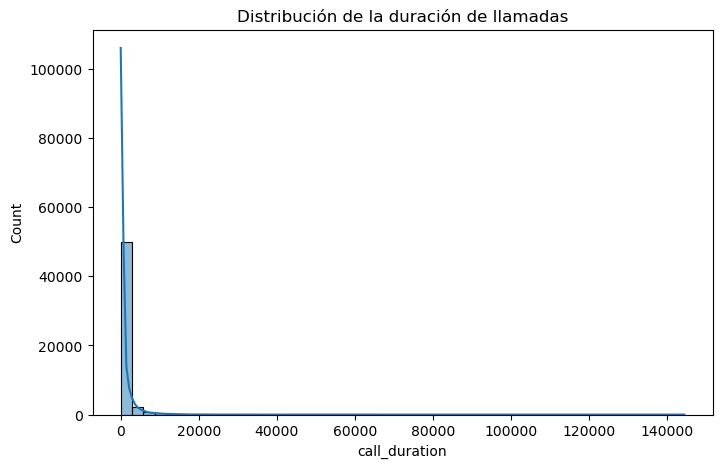

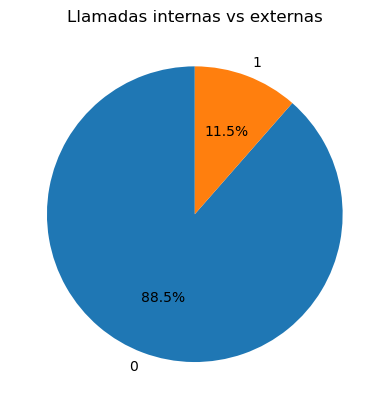

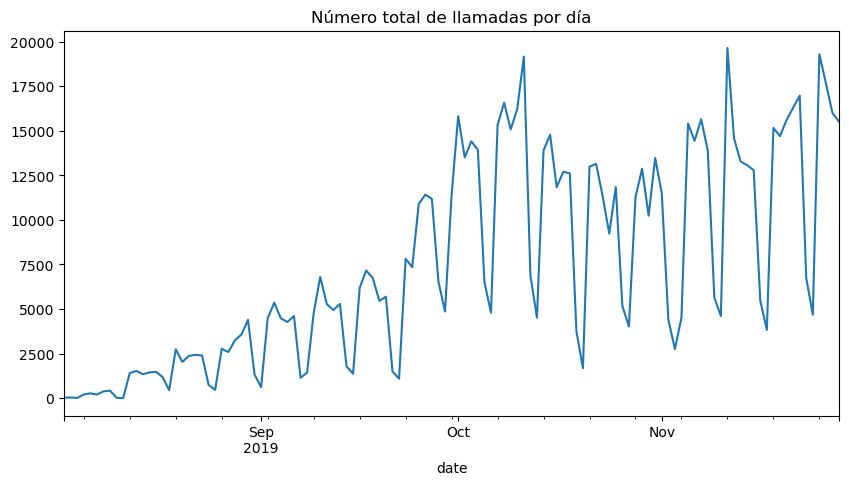

In [23]:

# 5. Visualizaciones básicas
if 'call_duration' in calls.columns:
    plt.figure(figsize=(8,5))
    sns.histplot(calls['call_duration'], bins=50, kde=True)
    plt.title("Distribución de la duración de llamadas")
    plt.show()

if 'internal' in calls.columns:
    calls['internal'].astype(str).value_counts().plot.pie(autopct='%1.1f%%', startangle=90)
    plt.title("Llamadas internas vs externas")
    plt.ylabel("")
    plt.show()

if {'date','calls_count'}.issubset(calls.columns):
    calls.groupby('date')['calls_count'].sum().plot(figsize=(10,5))
    plt.title("Número total de llamadas por día")
    plt.show()


In [24]:
# 6. Identificación de operadores ineficientes
in_df  = calls[calls['direction']=='in']
out_df = calls[calls['direction']=='out']

in_agg = in_df.groupby('operator_id').agg(
    in_calls=('calls_count','sum'),
    missed=('is_missed_call','sum'),
    wait_avg=('waiting_time','mean')
).reset_index()
out_agg = out_df.groupby('operator_id').agg(out_calls=('calls_count','sum')).reset_index()

ops = in_agg.merge(out_agg, on='operator_id', how='outer').fillna(0)
ops['miss_rate'] = ops['missed'] / ops['in_calls'].replace(0,np.nan)

# --- UMBRALES: ajustables y robustos ---
min_in_calls  = 10
missed_rate_cut = 0.20       # >=20% de llamadas entrantes perdidas
avg_wait_cut   = 20          # >=20 s de espera promedio
low_out_thr    = ops[ops['out_calls']>0]['out_calls'].quantile(0.25) if len(ops)>0 else 0

def clasificar(row):
    reasons=[]
    if row['in_calls']>=min_in_calls:
        if row['miss_rate']>=missed_rate_cut and row['wait_avg']>=avg_wait_cut:
            reasons.append('alta perdida + alta espera')
        elif row['miss_rate']>=missed_rate_cut:
            reasons.append('alta perdida')
        elif row['wait_avg']>=avg_wait_cut:
            reasons.append('alta espera')
    if row['out_calls']>0 and row['out_calls']<low_out_thr:
        reasons.append('bajo volumen saliente')
    return ';'.join(reasons) if reasons else np.nan

ops['ineff_reason'] = ops.apply(clasificar, axis=1)
inefficient_ops = ops[ops['ineff_reason'].notna()].sort_values(by='miss_rate',ascending=False)

print("\n=== Operadores ineficientes ===")
display(inefficient_ops.head(50))


=== Operadores ineficientes ===


,operator_id,in_calls,missed,wait_avg,out_calls,miss_rate,ineff_reason
242,904344.0,7.0,2.0,31.000000,5.0,0.285714,bajo volumen saliente
42,888532.0,12.0,2.0,32.111111,206.0,0.166667,alta espera
419,918888.0,8.0,1.0,9.375000,3.0,0.125000,bajo volumen saliente
812,941844.0,8.0,1.0,27.600000,12.0,0.125000,bajo volumen saliente
354,911142.0,26.0,3.0,65.888889,0.0,0.115385,alta espera
40,888406.0,9.0,1.0,36.428571,6.0,0.111111,bajo volumen saliente
272,906392.0,19.0,2.0,31.875000,61.0,0.105263,alta espera
642,934076.0,11.0,1.0,44.428571,0.0,0.090909,alta espera
556,926490.0,11.0,1.0,27.333333,144.0,0.090909,alta espera
1018,958640.0,11.0,1.0,10.272727,11.0,0.090909,bajo volumen saliente


In [25]:
# 7. Prueba de hipótesis (Mann-Whitney si no normal)
ineff_ids = inefficient_ops['operator_id']
group_ineff = in_df[in_df['operator_id'].isin(ineff_ids)]['waiting_time']
group_rest  = in_df[~in_df['operator_id'].isin(ineff_ids)]['waiting_time']

if len(group_ineff)>0 and len(group_rest)>0:
    u_stat,p_val = stats.mannwhitneyu(group_ineff, group_rest, alternative='two-sided')
    print(f"\nMann-Whitney U: U={u_stat:.2f}, p={p_val:.4f}")
else:
    print("\nDatos insuficientes para prueba de hipótesis.")

  


Mann-Whitney U: U=26558727.50, p=0.0000


In [26]:
alpha = 0.05
if p_val < alpha:
    print("Conclusión: Se rechaza la hipótesis nula. "
          "Los operadores ineficientes presentan tiempos de espera "
          "significativamente mayores (p = {:.4g}).".format(p_val))
else:
    print("Conclusión: No se detecta diferencia significativa entre los grupos.")

Conclusión: Se rechaza la hipótesis nula. Los operadores ineficientes presentan tiempos de espera significativamente mayores (p = 3.291e-287).


In [27]:

# 8. Dashboards interactivos
if 'call_duration' in calls.columns:
    px.histogram(calls, x='call_duration', nbins=50, color='direction',
                 title="Duración de llamadas por tipo").show()
if 'internal' in calls.columns:
    calls['internal_str'] = calls['internal'].astype(str)
    px.pie(calls, names='internal_str', title="Internas vs externas").show()
if {'date','calls_count','internal'}.issubset(calls.columns):
    px.histogram(calls, x='date', y='calls_count', color='internal',
                 title="Llamadas por día (stacked)").show()
if not inefficient_ops.empty:
    px.bar(inefficient_ops, x='operator_id', y='miss_rate',
           title='Tasa de llamadas perdidas (ineficientes)',
           text='miss_rate').update_traces(texttemplate='%{text:.2%}').show()